In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('housing data.csv')

In [3]:
df

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Creo el dataframe y me doy cuenta que las columnas son valores

In [4]:
df = df.rename(columns={'0.00632' :'CRIM','18.00' : 'ZN', '2.310' : 'INDUS', '0' : 'CHAS', '0.5380' : 'NOX', '6.5750':'RM', '65.20':'AGE', '4.0900':'DIS', '1':'RAD', '296.0':'TAX', '15.30':'RTRATIO', '396.90':'B', '4.98':'LSTAT', '24.00':'MEDV'})

In [5]:
nueva_fila = pd.Series({'CRIM':0.00632, 'ZN':18, 'INDUS':2.310, 'CHAS':0, 'NOX':0.538, 'RM':6.575, 'AGE':65.20, 'DIS':4.09, 'RAD':1, 'TAX':296, 'RTRATIO':15.3, 'B':396.9, 'LSTAT':4.98, 'MEDV':24})
df = df.append(nueva_fila, ignore_index=True)

/var/folders/sw/wl_2gz5d4432q2_rbg121j_80000gn/T/ipykernel_64649/1904589545.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(nueva_fila, ignore_index=True)


In [6]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,RTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
504,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


Cambio el nombre de las columnas por aquellas que ven abajo, y agrego los datos en una nueva fila.

## Datos de vivienda de Boston
#### Valor de la vivienda en los suburbios de Boston.

    1. CRIM: tasa de criminalidad per cápita por ciudad
    2. ZN: proporción de suelo residencial zonificado para lotes de más 25,000 pies cuadrados.
    3. INDUS: proporción de acres de negocios no minoristas por ciudad
    4. CHAS: variable ficticia de Charles River (= 1 si el tramo limitarío; 0 en caso contrario)
    5. NOX: concentración de óxidos nítricos (partes por 10 millones)
    6. RM: número medio de habitaciones por vivienda
    7. AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940
    8. DIS: distancias ponderadas a cinco centros de empleo de Boston
    9. RAD: índice de accesibilidad a carreteras radiales
    10.TAX: tasa de impuesto a la propiedad de valor total por $10,000.
    11.PTRATIO: ratio alumnos-profesor por localidad
    12.B: 1000(Bk - 0,63)^2 donde Bk es la proporción de negros por ciudad
    13.LSTAT: % de estatus más bajo de la población.
    14.MEDV: Valor medio de viviendas ocupadas por sus propietarios en miles de dólares

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
RTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,RTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Checamos los null y los duplicados, para hacer limpieza. Tambien hacemos un describe para analizar los datos.

# Ejercicio 1
Parte el conjunto de datos adjunto en train y test. Estudia ambos conjuntos por separado, a nivel descriptivo.

In [10]:
x = df.drop('MEDV', axis = 1)

In [11]:
y = df['MEDV']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=4)

Separamos los datos en train-test en 80-20. Usando 'MEDV' ya que es dato que buscamos predecir.

In [13]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,RTRATIO,B,LSTAT
192,0.02187,60.0,2.93,0.0,0.401,6.800,9.9,6.2196,1.0,265.0,15.6,393.37,5.03
138,0.54452,0.0,21.89,0.0,0.624,6.151,97.9,1.6687,4.0,437.0,21.2,396.90,18.46
251,0.08221,22.0,5.86,0.0,0.431,6.957,6.8,8.9067,7.0,330.0,19.1,386.09,3.53
13,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26
256,0.61154,20.0,3.97,0.0,0.647,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,24.39380,0.0,18.10,0.0,0.700,4.652,100.0,1.4672,24.0,666.0,20.2,396.90,28.28
197,0.03768,80.0,1.52,0.0,0.404,7.274,38.3,7.3090,2.0,329.0,12.6,392.20,6.62
439,22.05110,0.0,18.10,0.0,0.740,5.818,92.4,1.8662,24.0,666.0,20.2,391.45,22.11
174,0.06664,0.0,4.05,0.0,0.510,6.546,33.1,3.1323,5.0,296.0,16.6,390.96,5.33


In [14]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,RTRATIO,B,LSTAT
8,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10
289,0.03502,80.0,4.95,0.0,0.411,6.861,27.9,5.1167,4.0,245.0,19.2,396.90,3.33
68,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,18.9,396.90,8.79
211,0.21719,0.0,10.59,1.0,0.489,5.807,53.8,3.6526,4.0,277.0,18.6,390.94,16.03
226,0.41238,0.0,6.20,0.0,0.504,7.163,79.9,3.2157,8.0,307.0,17.4,372.08,6.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,5.66998,0.0,18.10,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73
144,2.37934,0.0,19.58,0.0,0.871,6.130,100.0,1.4191,5.0,403.0,14.7,172.91,27.80
336,0.03041,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,5.0,224.0,20.2,394.81,10.56
437,13.67810,0.0,18.10,0.0,0.740,5.935,87.9,1.8206,24.0,666.0,20.2,68.95,34.02


In [15]:
y_train

192    31.1
138    17.8
251    29.6
13     18.2
256    50.0
       ... 
385    10.5
197    34.6
439    10.5
174    29.4
122    17.3
Name: MEDV, Length: 404, dtype: float64

In [16]:
y_test

8      18.9
289    28.5
68     20.9
211    22.4
226    31.6
       ... 
368    50.0
144    13.8
336    18.5
437     8.4
216    28.7
Name: MEDV, Length: 102, dtype: float64

---

# Ejercicio 2
Aplica algún proceso de transformación (estandarizar los datos numéricos, crear columnas dummies, polinomios...).

In [17]:
pd.get_dummies(df['RAD'], prefix='RAD')

,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
501,1,0,0,0,0,0,0,0,0
502,1,0,0,0,0,0,0,0,0
503,1,0,0,0,0,0,0,0,0
504,1,0,0,0,0,0,0,0,0


In [18]:
x_train = pd.concat([x_train, pd.get_dummies(x_train['RAD'], prefix='RAD')], axis=1)

In [19]:
pd.set_option('display.max_columns',500)
x_train = x_train.drop('RAD', axis = 1)
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,RTRATIO,B,LSTAT,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
192,0.02187,60.0,2.93,0.0,0.401,6.800,9.9,6.2196,265.0,15.6,393.37,5.03,1,0,0,0,0,0,0,0,0
138,0.54452,0.0,21.89,0.0,0.624,6.151,97.9,1.6687,437.0,21.2,396.90,18.46,0,0,0,1,0,0,0,0,0
251,0.08221,22.0,5.86,0.0,0.431,6.957,6.8,8.9067,330.0,19.1,386.09,3.53,0,0,0,0,0,0,1,0,0
13,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,307.0,21.0,380.02,10.26,0,0,0,1,0,0,0,0,0
256,0.61154,20.0,3.97,0.0,0.647,8.704,86.9,1.8010,264.0,13.0,389.70,5.12,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,24.39380,0.0,18.10,0.0,0.700,4.652,100.0,1.4672,666.0,20.2,396.90,28.28,0,0,0,0,0,0,0,0,1
197,0.03768,80.0,1.52,0.0,0.404,7.274,38.3,7.3090,329.0,12.6,392.20,6.62,0,1,0,0,0,0,0,0,0
439,22.05110,0.0,18.10,0.0,0.740,5.818,92.4,1.8662,666.0,20.2,391.45,22.11,0,0,0,0,0,0,0,0,1
174,0.06664,0.0,4.05,0.0,0.510,6.546,33.1,3.1323,296.0,16.6,390.96,5.33,0,0,0,0,1,0,0,0,0


In [20]:
x_test = pd.concat([x_test, pd.get_dummies(x_test['RAD'], prefix='RAD')], axis=1)
x_test = x_test.drop('RAD', axis = 1)
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,RTRATIO,B,LSTAT,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_8.0,RAD_24.0
8,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,311.0,15.2,386.71,17.10,0,0,0,0,1,0,0,0
289,0.03502,80.0,4.95,0.0,0.411,6.861,27.9,5.1167,245.0,19.2,396.90,3.33,0,0,0,1,0,0,0,0
68,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,345.0,18.9,396.90,8.79,0,0,0,1,0,0,0,0
211,0.21719,0.0,10.59,1.0,0.489,5.807,53.8,3.6526,277.0,18.6,390.94,16.03,0,0,0,1,0,0,0,0
226,0.41238,0.0,6.20,0.0,0.504,7.163,79.9,3.2157,307.0,17.4,372.08,6.36,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,5.66998,0.0,18.10,1.0,0.631,6.683,96.8,1.3567,666.0,20.2,375.33,3.73,0,0,0,0,0,0,0,1
144,2.37934,0.0,19.58,0.0,0.871,6.130,100.0,1.4191,403.0,14.7,172.91,27.80,0,0,0,0,1,0,0,0
336,0.03041,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,224.0,20.2,394.81,10.56,0,0,0,0,1,0,0,0
437,13.67810,0.0,18.10,0.0,0.740,5.935,87.9,1.8206,666.0,20.2,68.95,34.02,0,0,0,0,0,0,0,1


Aplicamos get_dummies en RAD ya que es un índice de accecibilidad por lo que deben ser contados como si fueran valores string y no como valores númericos.

In [21]:
from scipy import stats

Tax = stats.zscore(x_train['TAX'])
Tax2 = stats.zscore(x_test['TAX'])
Tax

192   -0.868051
138    0.139720
251   -0.487207
13    -0.621967
256   -0.873910
         ...   
385    1.481461
197   -0.493066
439    1.481461
174   -0.686418
122   -1.319204
Name: TAX, Length: 404, dtype: float64

In [22]:
Tax2

8     -0.493998
289   -0.913261
68    -0.278014
211   -0.709982
226   -0.519408
         ...   
368    1.761130
144    0.090429
336   -1.046663
437    1.761130
216   -0.716335
Name: TAX, Length: 102, dtype: float64

<Axes: xlabel='TAX', ylabel='Count'>

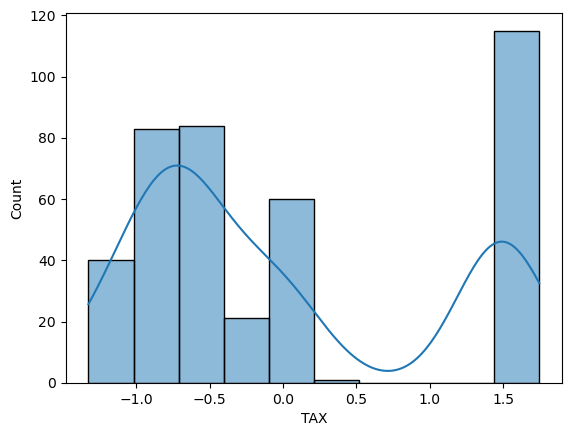

In [23]:
sns.histplot(Tax, kde = True)

<Axes: xlabel='TAX', ylabel='Count'>

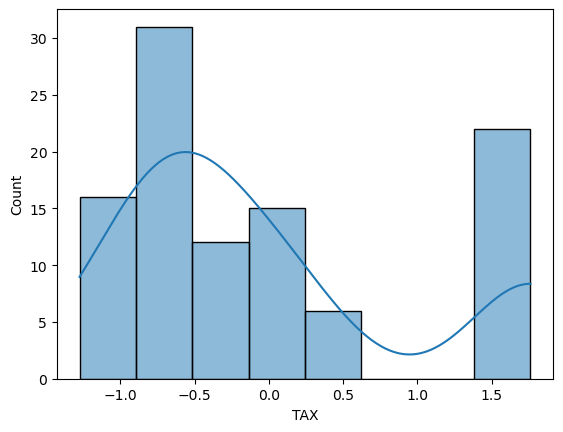

In [24]:
sns.histplot(Tax2, kde = True)

Aquí aplico una estandarización en 'TAX'. La estandarización sirve para tomar números muy amplios y reducirlos a un grupo más pequeño y facilitar calculos en operaciones muy especificas.  

Curiosamente vemos en el histplot la primera diferencia entre train y test, en train la columna prominente es 1.5 mientras que en test es la que esta entre -1.0 y -0.5. 

In [25]:
from scipy.stats import shapiro

In [26]:
for elemento in x_train.columns.values:
    stat, p = shapiro(x_train[elemento])
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probablemente Gaussiana')
    else:
        print('Probablemente no Gaussiana')

stat=0.450, p=0.000
Probablemente no Gaussiana
stat=0.557, p=0.000
Probablemente no Gaussiana
stat=0.894, p=0.000
Probablemente no Gaussiana
stat=0.256, p=0.000
Probablemente no Gaussiana
stat=0.937, p=0.000
Probablemente no Gaussiana
stat=0.961, p=0.000
Probablemente no Gaussiana
stat=0.884, p=0.000
Probablemente no Gaussiana
stat=0.897, p=0.000
Probablemente no Gaussiana
stat=0.814, p=0.000
Probablemente no Gaussiana
stat=0.900, p=0.000
Probablemente no Gaussiana
stat=0.471, p=0.000
Probablemente no Gaussiana
stat=0.936, p=0.000
Probablemente no Gaussiana
stat=0.184, p=0.000
Probablemente no Gaussiana
stat=0.208, p=0.000
Probablemente no Gaussiana
stat=0.287, p=0.000
Probablemente no Gaussiana
stat=0.487, p=0.000
Probablemente no Gaussiana
stat=0.523, p=0.000
Probablemente no Gaussiana
stat=0.236, p=0.000
Probablemente no Gaussiana
stat=0.200, p=0.000
Probablemente no Gaussiana
stat=0.208, p=0.000
Probablemente no Gaussiana
stat=0.556, p=0.000
Probablemente no Gaussiana


In [27]:
for elemento in x_test.columns.values:
    stat, p = shapiro(x_test[elemento])
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probablemente Gaussiana')
    else:
        print('Probablemente no Gaussiana')

stat=0.435, p=0.000
Probablemente no Gaussiana
stat=0.549, p=0.000
Probablemente no Gaussiana
stat=0.911, p=0.000
Probablemente no Gaussiana
stat=0.339, p=0.000
Probablemente no Gaussiana
stat=0.928, p=0.000
Probablemente no Gaussiana
stat=0.956, p=0.002
Probablemente no Gaussiana
stat=0.913, p=0.000
Probablemente no Gaussiana
stat=0.915, p=0.000
Probablemente no Gaussiana
stat=0.814, p=0.000
Probablemente no Gaussiana
stat=0.912, p=0.000
Probablemente no Gaussiana
stat=0.494, p=0.000
Probablemente no Gaussiana
stat=0.934, p=0.000
Probablemente no Gaussiana
stat=0.222, p=0.000
Probablemente no Gaussiana
stat=0.249, p=0.000
Probablemente no Gaussiana
stat=0.297, p=0.000
Probablemente no Gaussiana
stat=0.572, p=0.000
Probablemente no Gaussiana
stat=0.496, p=0.000
Probablemente no Gaussiana
stat=0.192, p=0.000
Probablemente no Gaussiana
stat=0.249, p=0.000
Probablemente no Gaussiana
stat=0.506, p=0.000
Probablemente no Gaussiana


Nos preparamos para hacer nuestro modelo, primero revisamos si las variables son normales, y podemos ver que, no, ninguna es normal.

Por lo que pasaremos a hacerles un boxplot para ubicar si tienen valores atípicos.

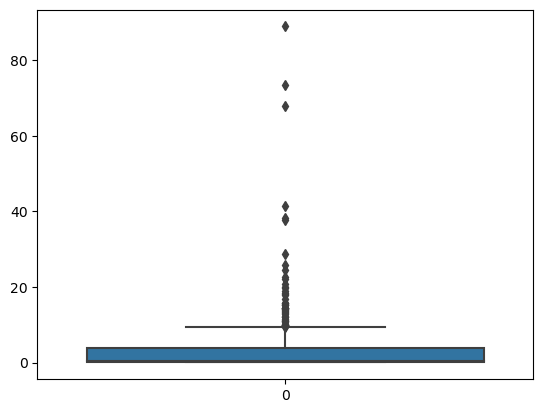

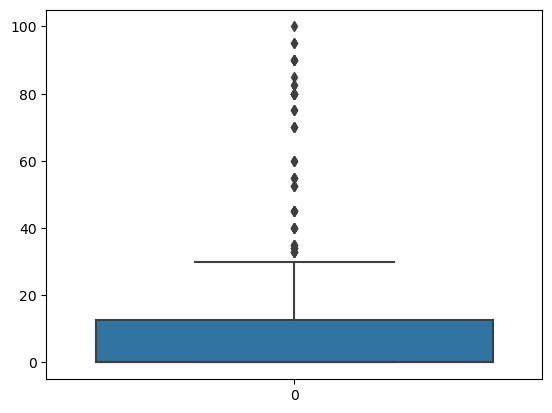

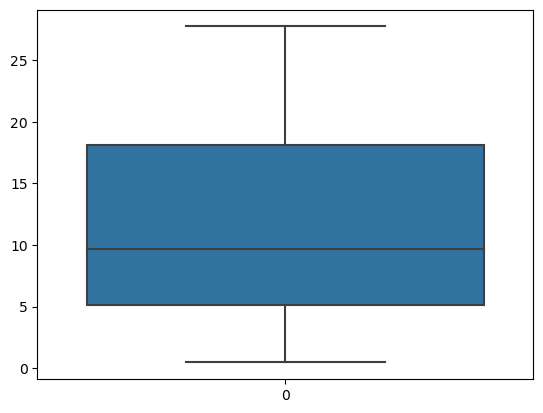

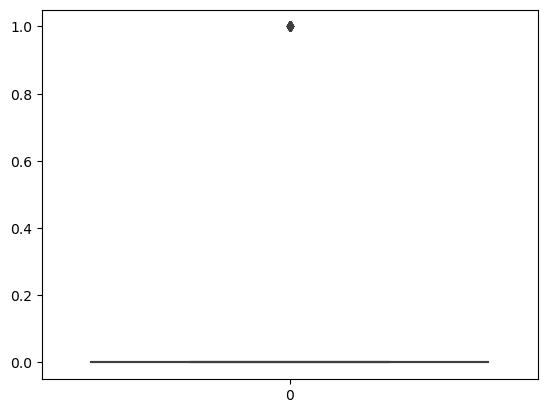

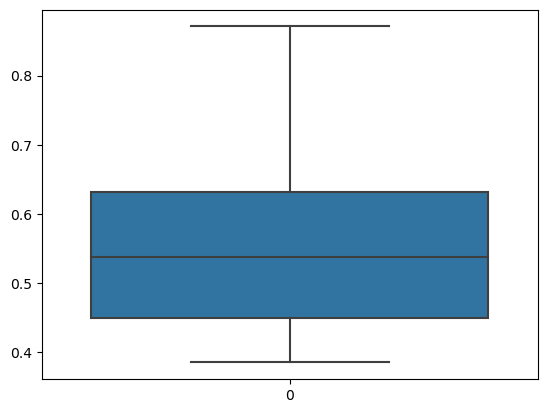

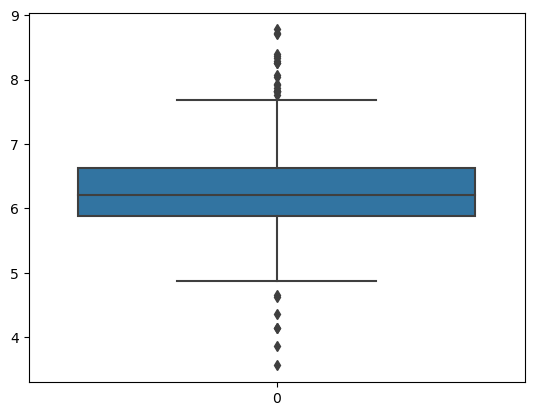

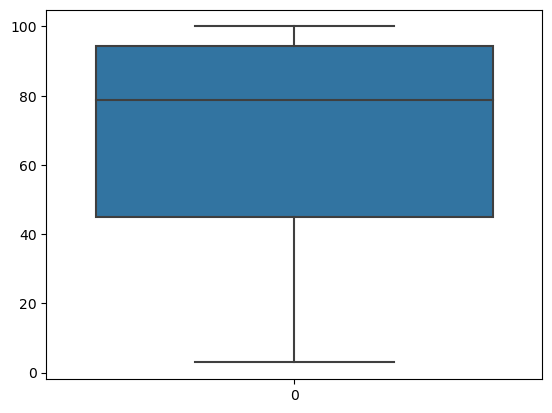

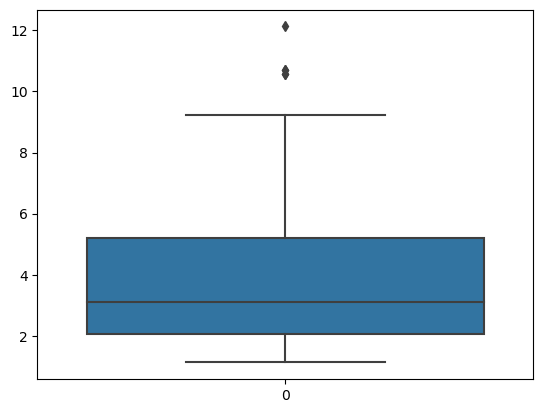

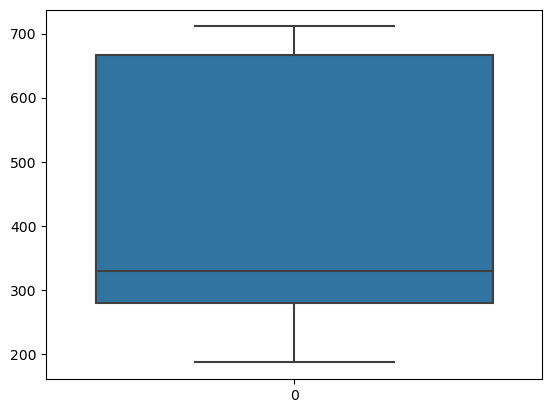

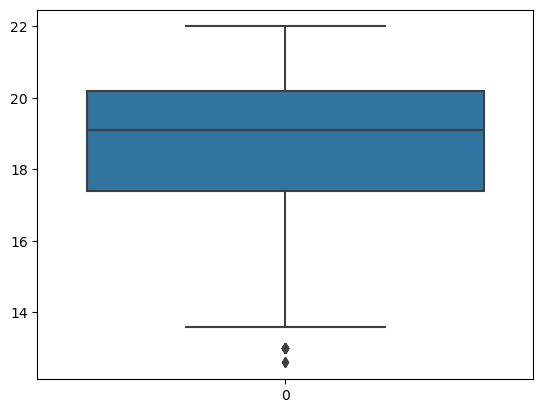

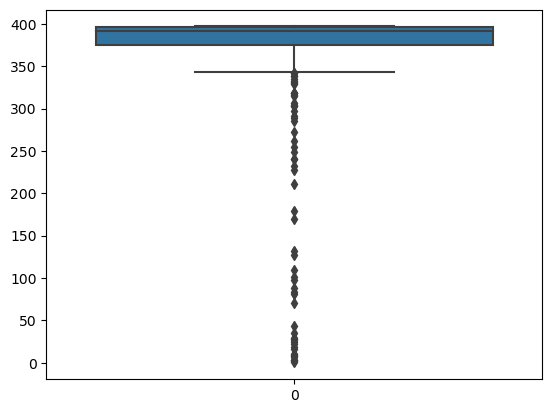

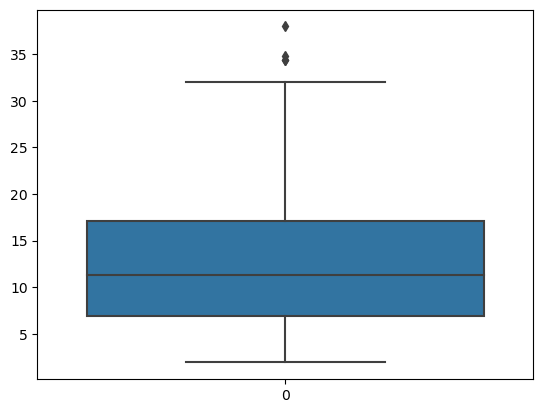

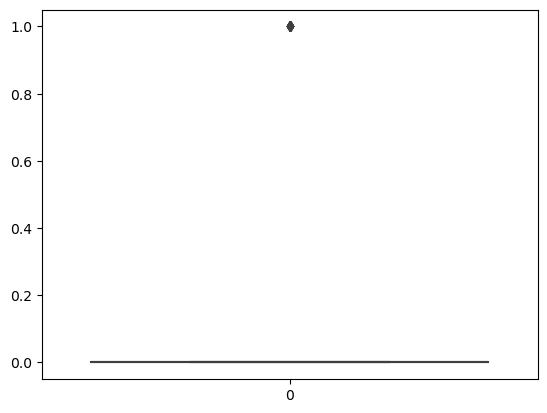

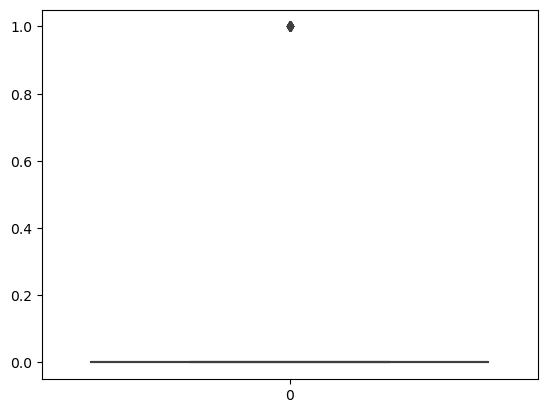

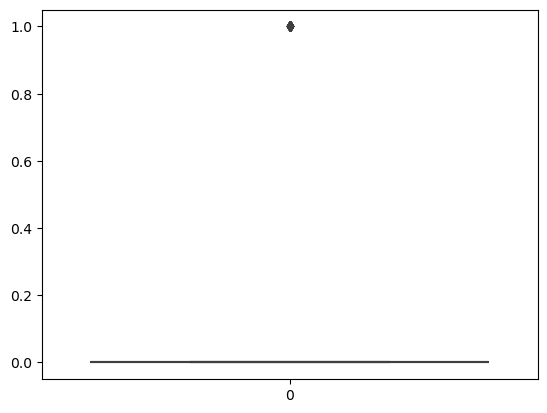

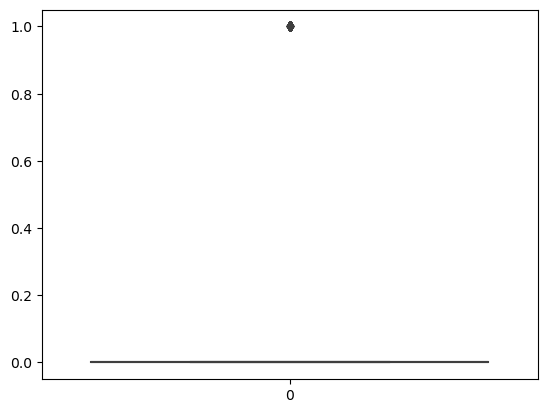

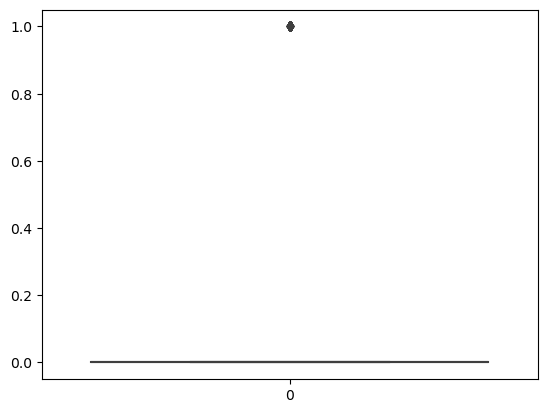

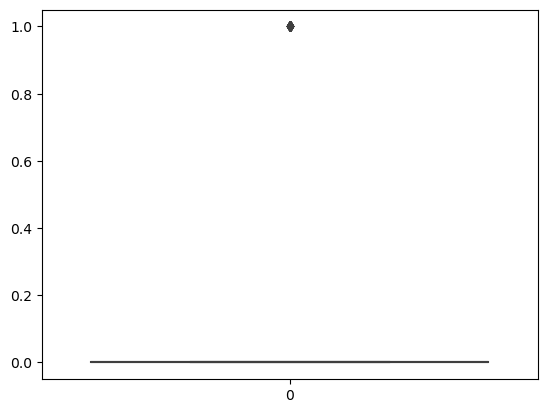

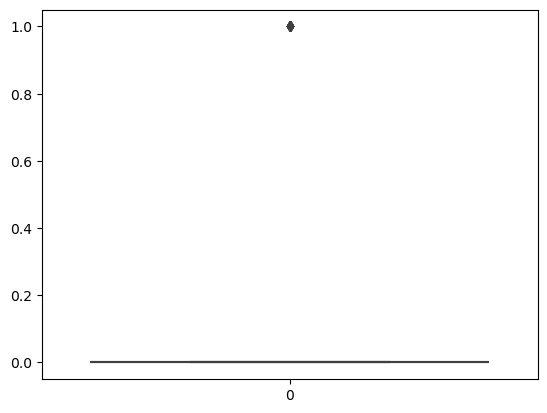

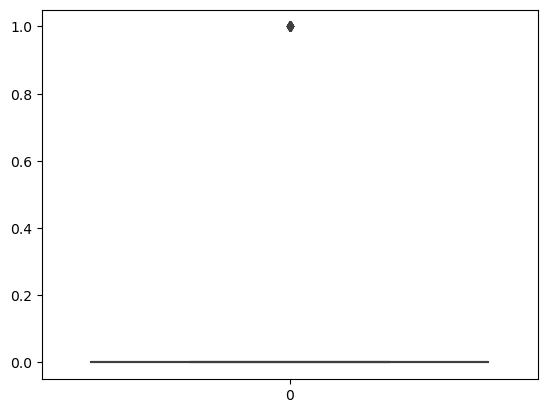

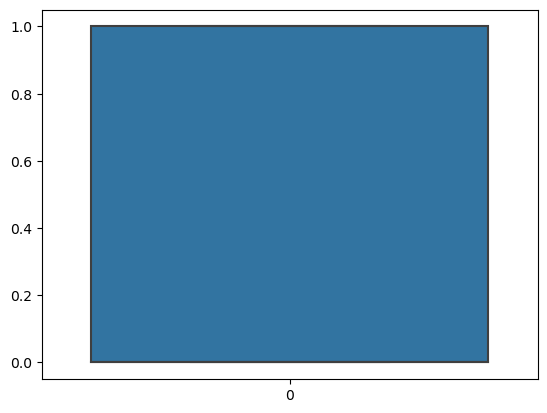

In [28]:
for elemento in x_train.columns.values:
    sns.boxplot(x_train[elemento])
    plt.show()

In [42]:
for elementos in x_test.columns.values:
    sns.boxplot(x_test[elemento])
    plt.show()

KeyError: 0

In [31]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [33]:
train_noAti = ['INDUS', 'NOX', 'AGE', 'TAX']
train_Ati = ['CRIM', 'ZN', 'RM', 'DIS', 'RTRATIO', 'B', 'LSTAT']
test_noAti = ['INDUS', 'AGE', 'DIS', 'TAX']
test_Ati = ['CRIM', 'ZN', 'NOX', 'RM', 'RTRATIO', 'B', 'LSTAT']

Divido nuestras variables dependiendo de aquellos que tuvieron valores atípicos y los que no. Tambien quite aquellas de valores son valores no númericos. ('CHAS', 'RAD')

Cabe destacar que no todas las variables en train y test fueron iguales, es decir, que algunas variables como 'NOX' tuvieron valores atípicos en una y en la otra no.

In [34]:
mms = MinMaxScaler()
x_train[train_noAti] = mms.fit_transform(x_train[train_noAti])

In [35]:
x_test[test_noAti] = mms.fit_transform(x_test[test_noAti])

In [36]:
rs = RobustScaler()
x_train[train_Ati] = rs.fit_transform(x_train[train_Ati])

In [37]:
x_test[test_Ati] = rs.fit_transform(x_test[test_Ati])

In [38]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,RTRATIO,B,LSTAT,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_7.0,RAD_8.0,RAD_24.0
192,-0.069141,4.80,0.090543,0.0,0.032922,0.788751,0.072091,0.992609,0.148855,-1.250000,0.068443,-0.616891,1,0,0,0,0,0,0,0,0
138,0.069913,0.00,0.785557,0.0,0.491770,-0.080348,0.978373,-0.458814,0.477099,0.750000,0.230593,0.698164,0,0,0,1,0,0,0,0,0
251,-0.053087,1.76,0.197947,0.0,0.094650,0.998996,0.040165,1.849608,0.272901,0.000000,-0.265962,-0.763770,0,0,0,0,0,0,1,0,0
13,0.094773,0.00,0.281525,0.0,0.314815,-0.154001,0.840371,0.432024,0.229008,0.678571,-0.544786,-0.104774,0,0,0,1,0,0,0,0,0
256,0.087744,1.60,0.128666,0.0,0.539095,3.338467,0.865088,-0.416619,0.146947,-2.178571,-0.100138,-0.608078,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,6.415139,0.00,0.646628,0.0,0.648148,-2.087713,1.000000,-0.523079,0.914122,0.392857,0.230593,1.659731,0,0,0,0,0,0,0,0,1
197,-0.064935,6.40,0.038856,0.0,0.039095,1.423502,0.364573,1.340052,0.270992,-2.321429,0.014699,-0.461200,0,1,0,0,0,0,0,0,0
439,5.791852,0.00,0.646628,0.0,0.730453,-0.526281,0.921730,-0.395825,0.914122,0.392857,-0.019752,1.055569,0,0,0,0,0,0,0,0,1
174,-0.057230,0.00,0.131598,0.0,0.257202,0.448611,0.311020,0.007973,0.208015,-0.892857,-0.042260,-0.587515,0,0,0,0,1,0,0,0,0


In [39]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,RTRATIO,B,LSTAT,RAD_1.0,RAD_2.0,RAD_3.0,RAD_4.0,RAD_5.0,RAD_6.0,RAD_8.0,RAD_24.0
8,-0.041003,1.0,0.286230,0.0,0.012214,-0.230021,0.849680,0.671991,0.257322,-1.252174,-0.223812,0.673179,0,0,0,0,1,0,0,0
289,-0.140315,6.4,0.169008,0.0,-0.677863,0.961084,0.231343,0.488037,0.119247,0.139130,0.326404,-0.957371,0,0,0,1,0,0,0,0
68,-0.071807,1.0,0.213970,0.0,-0.690076,-0.395413,0.285714,0.660258,0.328452,0.034783,0.326404,-0.310835,0,0,0,1,0,0,0,0
211,-0.006322,0.0,0.395424,1.0,-0.201527,-0.503822,0.507463,0.305492,0.186192,-0.069565,0.004590,0.546477,0,0,0,1,0,0,0,0
226,0.137248,0.0,0.219189,0.0,-0.109924,1.380820,0.785714,0.251019,0.248954,-0.486957,-1.013769,-0.598579,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,4.004410,0.0,0.696909,1.0,0.665649,0.713690,0.965885,0.019238,1.000000,0.486957,-0.838283,-0.910006,0,0,0,0,0,0,0,1
144,1.584020,0.0,0.756323,0.0,2.131298,-0.054899,1.000000,0.027018,0.449791,-1.426087,-11.768089,1.940201,0,0,0,0,1,0,0,0
336,-0.143706,0.0,0.178643,0.0,-0.042748,-0.381515,0.569296,0.550165,0.075314,0.486957,0.213553,-0.101243,0,0,0,0,1,0,0,0
437,9.894682,0.0,0.696909,0.0,1.331298,-0.325921,0.871002,0.077077,1.000000,0.486957,-17.381479,2.676732,0,0,0,0,0,0,0,1


In [55]:
train_x= ['CRIM', 'ZN', 'RM', 'DIS', 'RTRATIO', 'B', 'LSTAT', 'INDUS', 'AGE', 'TAX', 'NOX']
test_x = ['CRIM', 'ZN', 'RM', 'DIS', 'RTRATIO', 'B', 'LSTAT', 'INDUS', 'AGE', 'TAX', 'NOX']

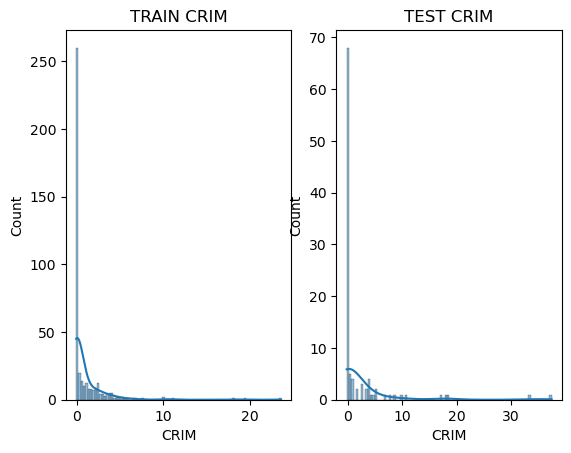

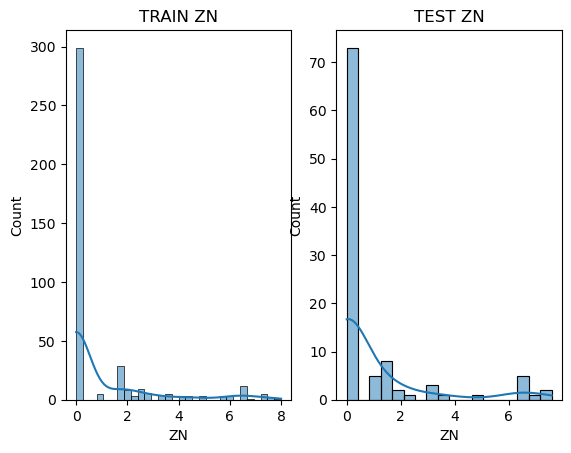

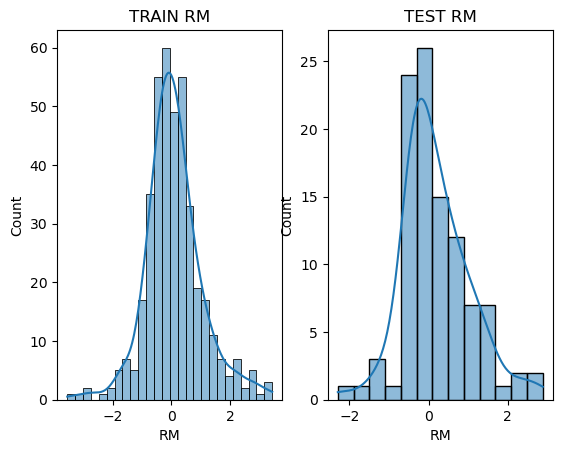

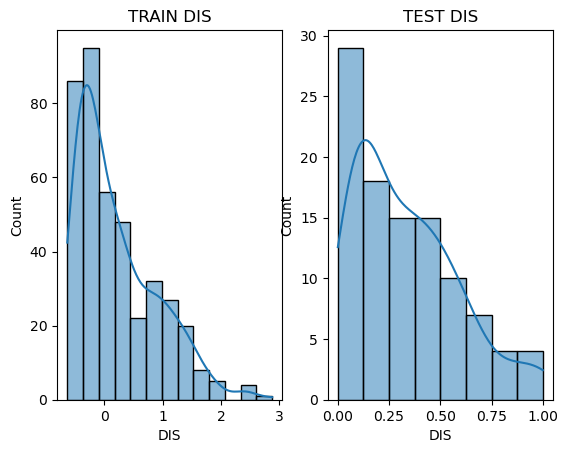

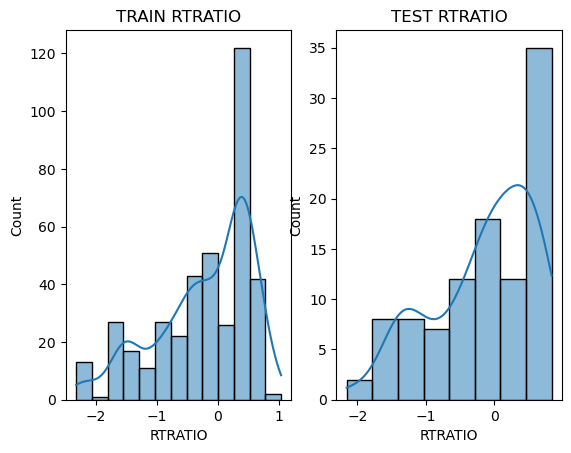

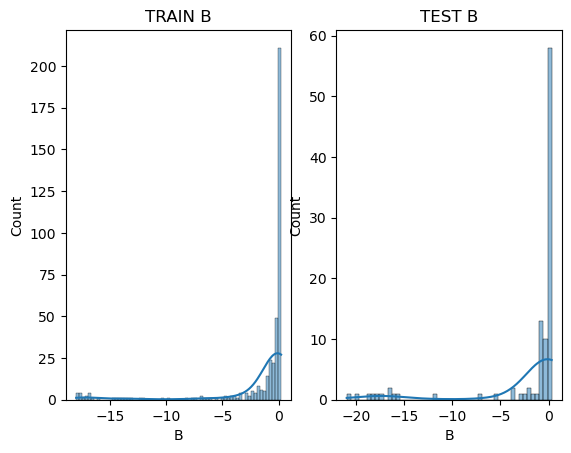

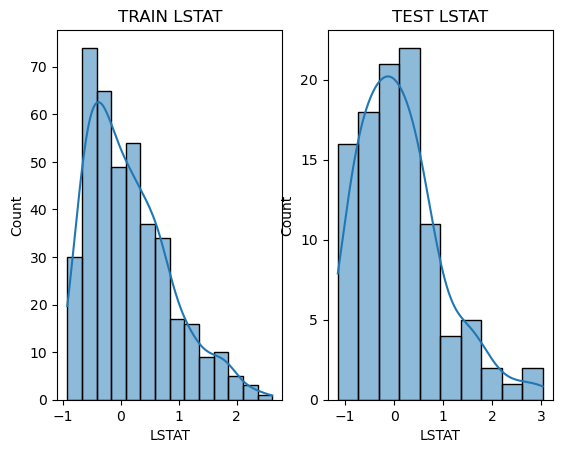

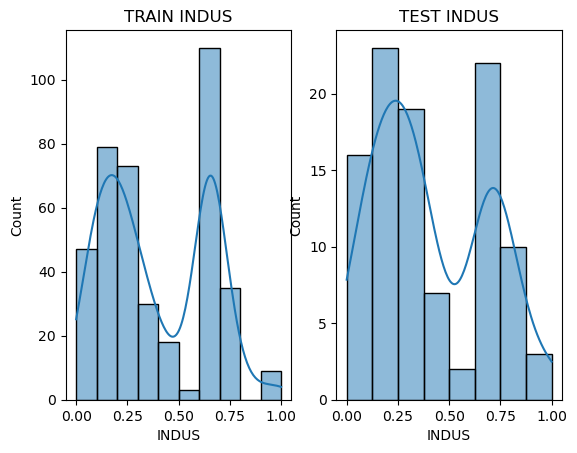

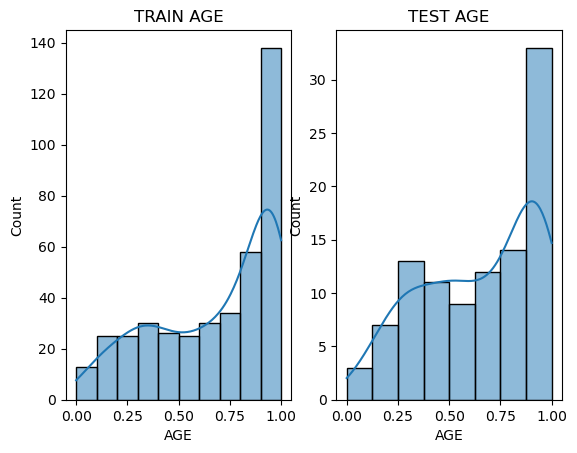

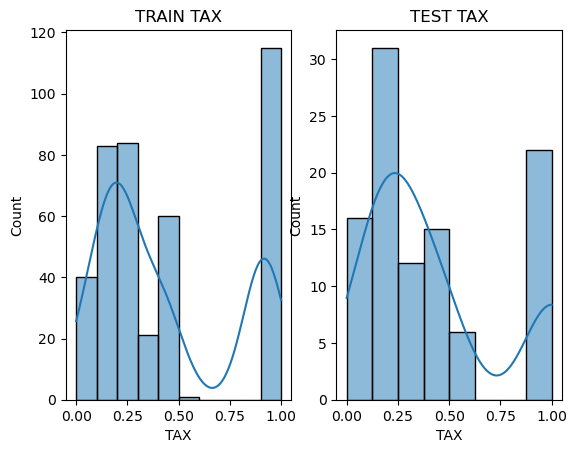

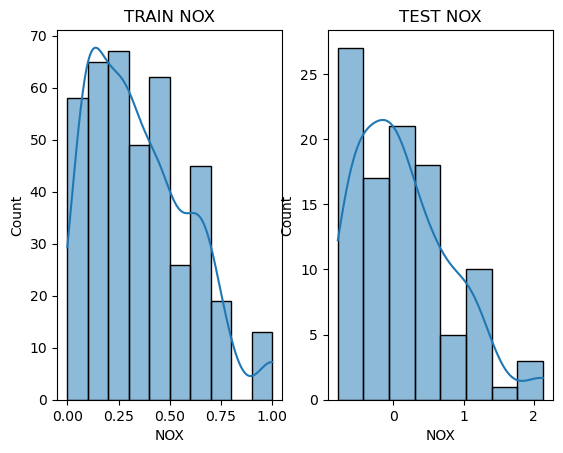

In [56]:
for columna_test, columna_train in zip(test_x, train_x):
    fig, axes = plt.subplots(1, 2)
    sns.histplot(ax=axes[0], x=x_train[columna_train], kde = True)
    axes[0].set_title("TRAIN " + columna_train)

    sns.histplot(ax=axes[1], x=x_test[columna_test], kde = True)
    axes[1].set_title("TEST " + columna_test)

Finalmente tenemos el modelo entrenado y testiado y lo que vemos es: en la grafica de 'NOX' la cual me interesaba especialmente porque se diferencio en los valores atípicos por sus diferencias en Train y Test, puedo ver que los valores en Test caen muchos en negativos mientras que en Train ni siquiera existe, sin embargo la linea tiene cierta similitud.